In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

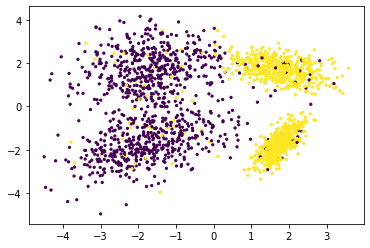

In [16]:
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, random_state=21, class_sep=1.75, flip_y=0.1)
plt.scatter(X[:,0], X[:,1], c=y, s=5)

In [24]:
clf1 = LogisticRegression().fit(X,y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X,y)
clf3 = VotingClassifier(
    estimators=[('clf1', clf1), ('clf2', clf2)],
    voting='soft',
    weights=[010.5,2.5]
)
clf3.fit(X,y)

VotingClassifier(estimators=[('clf1', LogisticRegression()),
                             ('clf2', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft', weights=[10.5, 2.5])

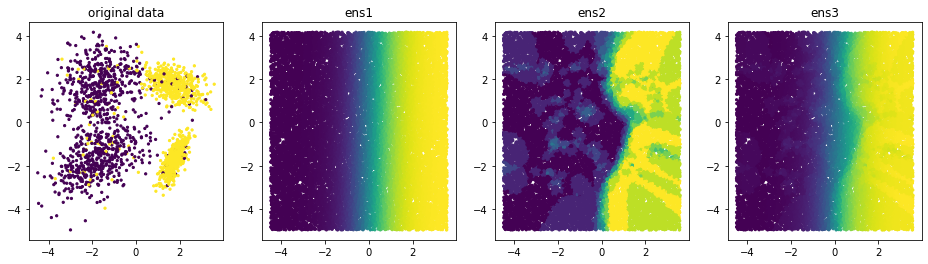

In [25]:
make_plots()

In [59]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer
from sklego.meta import Thresholder
from sklearn.pipeline import Pipeline
import pandas as pd

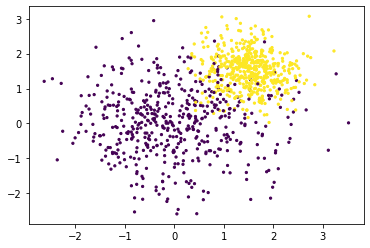

In [28]:
X,y = make_blobs(1000,centers=[(0,0), (1.5, 1.5)], cluster_std=[1,0.5])
plt.scatter(X[:,0], X[:,1], c=y, s=5)

In [55]:
#m1 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1).fit(X,y)
#m2 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.9).fit(X,y)
pipe = Pipeline([
    ('model', Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1))
])

In [60]:


mod = GridSearchCV(estimator=pipe,
    param_grid = {"model__threshold": np.linspace(0.1,0.9,50)},

    scoring={"precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "accuracy": make_scorer(accuracy_score)},
    refit="precision",
    cv = 5
)
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__threshold,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.007343,0.006746,0.001629,0.000067,0.1,{'model__threshold': 0.1},0.787402,0.787402,0.798387,0.787402,0.813008,0.794720,0.010085,50,1.00,1.00,0.99,1.00,1.00,0.998,0.004000,1,0.865,0.865,0.870,0.865,0.885,0.870,0.007746,44
1,0.003404,0.000203,0.001594,0.000314,0.116327,{'model__threshold': 0.1163265306122449},0.793651,0.787402,0.804878,0.793651,0.831933,0.802303,0.015851,49,1.00,1.00,0.99,1.00,0.99,0.996,0.004899,2,0.870,0.865,0.875,0.870,0.895,0.875,0.010488,42
2,0.003369,0.000529,0.001398,0.000192,0.132653,{'model__threshold': 0.1326530612244898},0.800000,0.792000,0.804878,0.793651,0.831933,0.804492,0.014470,48,1.00,0.99,0.99,1.00,0.99,0.994,0.004899,3,0.875,0.865,0.875,0.870,0.895,0.876,0.010198,41
3,0.003706,0.000520,0.001451,0.000170,0.14898,{'model__threshold': 0.1489795918367347},0.806452,0.811475,0.811475,0.811475,0.831933,0.814562,0.008901,47,1.00,0.99,0.99,0.99,0.99,0.992,0.004000,4,0.880,0.880,0.880,0.880,0.895,0.883,0.006000,39
4,0.003692,0.001031,0.001453,0.000225,0.165306,{'model__threshold': 0.1653061224489796},0.819672,0.818182,0.811475,0.818182,0.838983,0.821299,0.009288,46,1.00,0.99,0.99,0.99,0.99,0.992,0.004000,4,0.890,0.885,0.880,0.885,0.900,0.888,0.006782,37
5,0.003473,0.000427,0.001388,0.000136,0.181633,{'model__threshold': 0.1816326530612245},0.840336,0.825000,0.825000,0.818182,0.838983,0.829500,0.008671,45,1.00,0.99,0.99,0.99,0.99,0.992,0.004000,4,0.905,0.890,0.890,0.885,0.900,0.894,0.007348,35
6,0.004317,0.000710,0.001684,0.000190,0.197959,{'model__threshold': 0.1979591836734694},0.840336,0.830508,0.823529,0.825000,0.853448,0.834564,0.011132,44,1.00,0.98,0.98,0.99,0.99,0.988,0.007483,7,0.905,0.890,0.885,0.890,0.910,0.896,0.009695,34
7,0.003446,0.000397,0.001585,0.000458,0.214286,{'model__threshold': 0.2142857142857143},0.853448,0.852174,0.823529,0.838983,0.868421,0.847311,0.015112,43,0.99,0.98,0.98,0.99,0.99,0.986,0.004899,8,0.910,0.905,0.885,0.900,0.920,0.904,0.011576,27
8,0.003430,0.000275,0.001505,0.000154,0.230612,{'model__threshold': 0.2306122448979592},0.860870,0.859649,0.823529,0.846154,0.883929,0.854826,0.019806,41,0.99,0.98,0.98,0.99,0.99,0.986,0.004899,8,0.915,0.910,0.885,0.905,0.930,0.909,0.014629,20
9,0.003524,0.000447,0.001435,0.000120,0.246939,{'model__threshold': 0.2469387755102041},0.859649,0.859649,0.823529,0.846154,0.882883,0.854373,0.019429,42,0.98,0.98,0.98,0.99,0.98,0.982,0.004000,10,0.910,0.910,0.885,0.905,0.925,0.907,0.012884,24


In [ ]:
##############################################################################

In [67]:
from sklego.meta import GroupedPredictor, DecayEstimator
from sklearn.dummy import DummyRegressor
from sklego.datasets import make_simpleseries


In [68]:
yt = make_simpleseries(seed=1)
dates = pd.date_range("2000-01-01", periods=len(yt))
df = (pd.DataFrame({'yt': yt,
                   'date': dates})
    .assign(m=lambda d: d.date.dt.month)
    .reset_index())

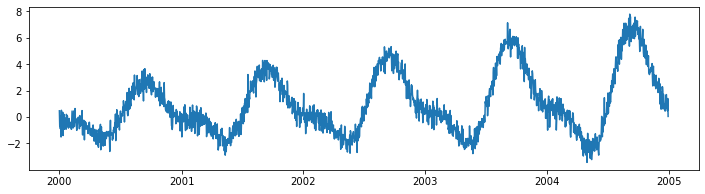

In [69]:
plt.figure(figsize=(12,3))
plt.plot(dates, make_simpleseries(seed=1))

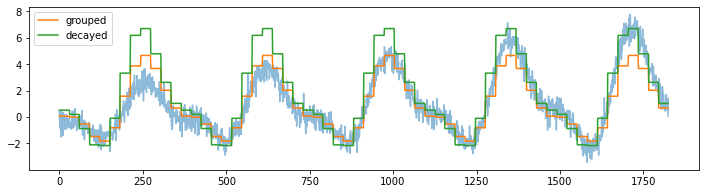

In [75]:
mod1=(GroupedPredictor(DummyRegressor(), groups=['m']).fit(df[['m']], df[['yt']]))
mod2=(GroupedPredictor(DecayEstimator(DummyRegressor(),decay=0.9), groups=['m'])
      .fit(df[['index','m']], df['yt']))

plt.figure(figsize=(12,3))
plt.plot(df['yt'], alpha=0.5);
plt.plot(mod1.predict(df[['m']]), label="grouped")
plt.plot(mod2.predict(df[['index','m']]), label="decayed")
plt.legend()
